In [1]:
!pip install imbalanced-learn

  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2


In [3]:
import pandas as pd
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [16]:
X, y = make_classification(n_classes=2,class_sep=2,
weights = [0.1,0.9], n_informative=3,n_redundant=1,flip_y=0,
n_features = 20,n_clusters_per_class=1,n_samples=1000,random_state=10)
print("Origianal dataset shape %s"% Counter(y))

Origianal dataset shape Counter({1: 900, 0: 100})


In [17]:
print(X,"\n",y)

[[ 0.60013068 -1.42766402 -0.8128431  ... -0.55302378  0.14876985
  -1.74795877]
 [ 0.25364115 -1.45638734 -0.52259796 ...  1.69409346 -0.24969905
   0.4587598 ]
 [ 0.18225579 -1.27960188  0.6780773  ... -0.81115113 -0.28733609
  -1.8361891 ]
 ...
 [-1.47024551  1.44291998 -0.61025173 ... -0.80856535  0.92899574
  -2.11510777]
 [ 1.16080297  1.07930132 -0.10917057 ... -2.58494382 -1.74326156
  -0.89317882]
 [-0.29874435 -1.48144343 -0.34051766 ... -0.17772046 -0.13834763
  -0.81195185]] 
 [0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1

In [8]:
df = pd.DataFrame(y)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

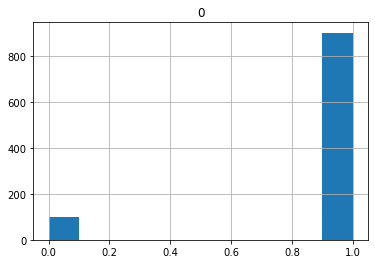

In [9]:
df.hist()

In [18]:
sm = SMOTE()
X_res, y_res = sm.fit_resample(X,y)
print("Resampled dataset shape %s" % Counter(y_res))

Resampled dataset shape Counter({0: 900, 1: 900})


Counter({0: 9900, 1: 100})


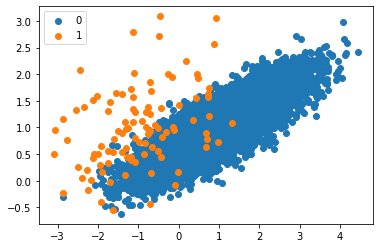

In [27]:
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

X,y = make_classification(n_samples = 10000,n_features=2,n_redundant=0,
                         n_clusters_per_class=1,weights=[0.99],flip_y=0,random_state=1)

counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()


Counter({0: 9900, 1: 100})
Counter({0: 9900, 1: 9900})


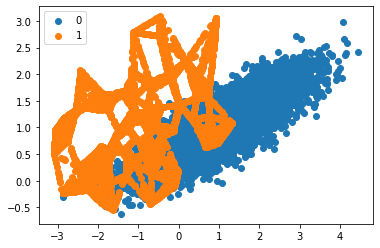

In [28]:

# Oversample and plot imbalanced dataset with SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
                           n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
    row_ix = where(y == label)[0]
    pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

In [38]:
oversample = SMOTE(sampling_strategy='not majority')
X_res, y_res = sm.fit_resample(X,y)
print("Resampled dataset shape %s" % Counter(y_res))

Resampled dataset shape Counter({0: 9900, 1: 9900})


Counter({2: 400, 1: 300, 0: 300})
 Counter({1: 400, 2: 400, 0: 400})


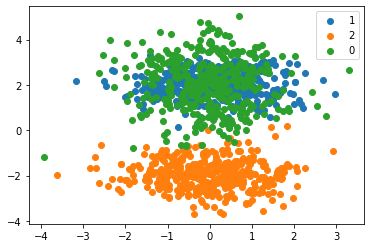

In [44]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from numpy import where

# Generar el conjunto de datos original con tres clases
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=3,
    n_redundant=1,
    n_clusters_per_class=1,
    n_classes=3,  # 3 clases
    weights=[0.3, 0.3, 0.4],  # pesos
    class_sep=2,
    flip_y=0,
    random_state=1
)

print('%s' % Counter(y))

# Sobremuestrear el conjunto de datos con SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, y)

# Mostrar la distribución de clases después del remuestreo
print(' %s' % Counter(y_resampled))

# Graficar el conjunto de datos remuestreado
for label, _ in Counter(y_resampled).items():
    row_ix = where(y_resampled == label)[0]
    plt.scatter(X_resampled[row_ix, 0], X_resampled[row_ix, 1], label=str(label))

plt.legend()
plt.show()

[1 2 2 1 0 1 1 2 1 2 1 2 0 2 0 0 0 0 0 2 0 0 2 1 1 1 1 1 2 1 1 2 1 2 1 1 1
 0 0 0 2 1 2 2 1 2 0 0 2 2 2 2 0 2 0 0 1 2 0 0 2 2 1 2 2 2 1 0 2 1 0 1 2 2
 0 1 2 2 0 2 2 1 2 2 0 0 2 2 0 2 2 0 1 2 0 2 1 2 2 1 0 2 1 0 0 1 0 1 0 2 2
 2 2 1 0 1 1 0 2 2 2 2 0 0 2 1 2 1 1 1 0 2 2 0 1 0 2 1 1 0 1 2 2 1 1 0 1 2
 0 1 1 1 0 2 0 1 2 1 0 1 1 0 0 2 1 2 1 1 0 2 0 0 2 1 0 0 2 1 2 0 2 0 1 1 2
 2 1 0 0 0 2 1 0 1 2 1 2 1 0 0 2 0 2 2 1 1 2 0 1 2 1 2 0 2 2 0 1 0 1 0 1 1
 0 1 0 1 2 2 1 2 2 2 1 0 2 2 2 2 2 0 2 2 2 1 2 0 1 0 1 2 2 1 0 2 1 1 2 2 2
 2 0 1 1 1 0 2 2 2 2 0 2 1 2 2 2 0 1 1 2 2 0 1 2 2 0 0 1 2 2 1 0 2 2 1 1 1
 1 1 2 2 2 2 2 0 2 0 2 0 1 1 2 2 0 2 1 0 1 2 0 1 2 0 2 2 0 2 1 1 0 0 2 1 2
 2 2 2 1 2 2 1 2 2 2 0 0 2 1 0 1 0 0 2 2 2 0 0 2 2 0 2 1 2 1 0 0 2 2 2 1 1
 1 2 1 2 1 2 0 1 2 0 0 1 2 2 2 0 2 0 2 0 2 2 0 0 0 2 2 1 0 2 2 2 0 0 0 2 0
 1 2 0 1 2 2 0 1 1 1 2 1 0 2 1 2 0 2 2 2 2 2 1 1 2 0 2 2 0 1 1 0 2 0 2 1 0
 0 0 2 1 0 1 0 0 0 0 1 2 0 2 0 1 2 0 0 2 0 2 2 1 2 0 0 1 1 2 1 1 0 2 0 1 2
 0 1 2 0 2 2 2 1 0 2 2 2 

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

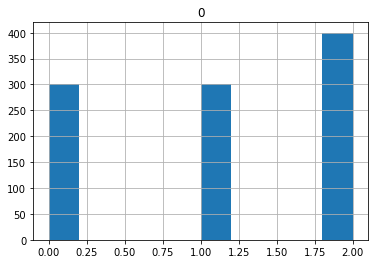

In [48]:
print(y)
df = pd.DataFrame(y)
df.hist()